In [99]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Zero finding

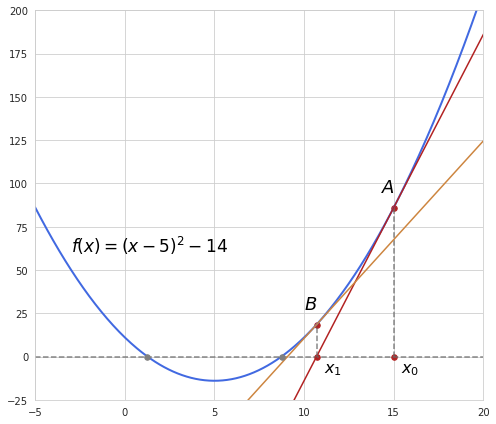

In [82]:
x = np.linspace(-5, 20, 300)

def func(x):
    return (x - 5)**2 - 14

def get_derivative(func, x0=0, degree=1):
    '''Get the derivative at x0 of n-th degree'''
    x = np.linspace(x0-6, x0+6, 3000)
    dx = x[1]-x[0]
    y = func(x)
    for i in range(degree):
        y = np.gradient(y, dx)
    closest_to_0_x = min(x, key=lambda x: abs(x - x0))
    zero_index_in_x = np.where(x==closest_to_0_x)[0][0]
    return y[zero_index_in_x]

def get_slope(x, x0):
    '''Get a linear slope function at point x0'''
    b = get_derivative(func, x0=x0)
    a = func(x0) - get_derivative(func, x0=x0)*x0
    x = np.array(x)
    return (a + x*b, a, b)

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(x, func(x), color='royalblue', lw=2)
ax.plot(x, np.full(x.size, 0), color='dimgrey', alpha=0.8, linestyle='--')
ax.scatter([-np.sqrt(14)+5, np.sqrt(14)+5], [0, 0], color='grey', s=30, zorder=20)
ax.set_xlim(-5, 20)
ax.set_ylim(-25, 200)
ax.text(-3, 60, '$f(x)=(x-5)^2-14$', size=17)

plt.tight_layout()

point_0 = 15
ax.scatter([point_0, point_0], [0, func(point_0)], color='firebrick', s=30)
ax.text(point_0 + 0.4, -9, '$x_0$', size=16)
ax.text(point_0 - 0.7, func(point_0) + 9, '$A$', size=18)
ax.plot([point_0, point_0], [0, func(point_0)], color='dimgrey', alpha=0.8, linestyle='--')
ax.plot(x, get_slope(x, point_0)[0], color='firebrick')

point_1 = -get_slope(x, point_0)[1]/get_slope(x, point_0)[2]
ax.scatter([point_1, point_1], [0, func(point_1)], color='firebrick', s=30)
ax.text(point_1 + 0.4, -9, '$x_1$', size=16)
ax.text(point_1 - 0.7, func(point_1) + 9, '$B$', size=18)
ax.plot([point_1, point_1], [0, func(point_1)], color='dimgrey', alpha=0.8, linestyle='--')
ax.plot(x, get_slope(x, point_1)[0], color='peru')

plt.savefig('../../assets/images/optimization/newton_zero_finding.png', bbox_inches='tight');

## Optimization

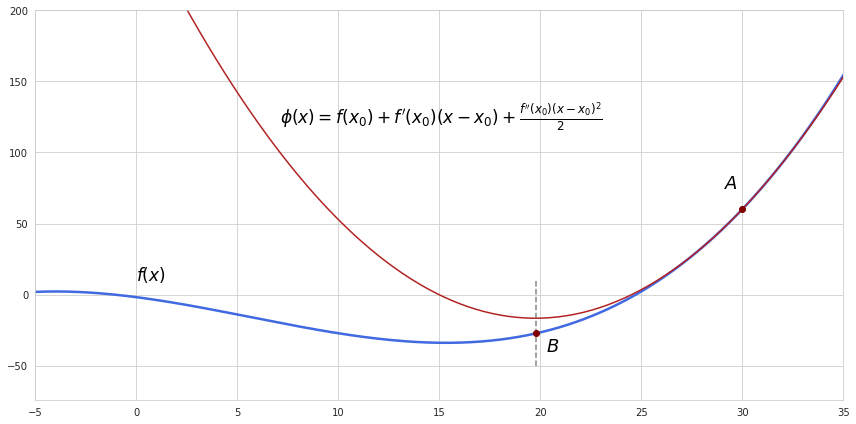

In [212]:
x = np.linspace(-5, 35, 300)

def func(x):
    return ((x-6)**2 + (x-6)**3 - 280*x) / 100

def taylor(x: np.ndarray, x0, order: int = 0) -> np.ndarray:
    y = np.full(len(x), 0) # dummy series
    for i in range(order+1):
        if i == 0:
            y = y + np.power(x-x0, i)*func(x0)
        else:
            y = y + np.power(x-x0, i)*get_derivative(func, x0=x0, degree=i)/factorial(i)
    return y

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, func(x), color='royalblue', lw=2.5)
ax.plot(x, taylor(x, 30, 2), color='firebrick')
ax.scatter(30, func(30), color='maroon', zorder=20)
ax.text(29.1, 75, '$A$', fontsize=18)
ax.text(0, 10, '$f(x)$', fontsize=17)
ax.text(7.1, 120, r"$\phi(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f ''(x_0)(x-x_0)^2}{2}$", fontsize=17)

ax.plot([19.8, 19.8], [-50, 10], linestyle='--', color='dimgrey', alpha=0.8)
ax.scatter(19.8, func(19.8), color='maroon', zorder=20)
ax.text(20.3, -40, '$B$', fontsize=18)

ax.set_xlim(-5, 35)
ax.set_ylim(top=200)    
plt.tight_layout()
plt.savefig('../../assets/images/optimization/newton_optimization.png', bbox_inches='tight');